In [38]:
import pandas as pd
import requests
import plotly.express as px

url = "https://api.census.gov/data/2018/abscs?get=NAME,EMP,PAYANN,SEX,EMPSZFI,ETH_GROUP,RACE_GROUP,VET_GROUP&for=state:50,56&key=55e66c014b79233a93d62e4de48c6b4cbae8d3fc"
# url2 = "https://api.census.gov/data/2018/abscb?get=NAME,BUSCHAR,EMP,PAYANN,SEX,EMPSZFI,ETH_GROUP,RACE_GROUP,VET_GROUP&for=state:50,56&key=55e66c014b79233a93d62e4de48c6b4cbae8d3fc"

response = requests.request("GET", url)
dataJson = response.json()
df = pd.DataFrame(dataJson)
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

# response2 = requests.request("GET", url2)
# dataJson2 = response2.json()
# df2 = pd.DataFrame(dataJson2)
# new_header2 = df2.iloc[0]
# df2 = df2[1:]
# df2.columns = new_header2

ModuleNotFoundError: No module named 'plotly'

Import the data using the API

In [ ]:
sexCodes =[["Sex Category", "SEX"], ["Total", "001"], ["Female", "002"], ["Male", "003"], ["Equally male-/female", "004"], ["Classifiable", "096"], ["Unclassifiable", "098"]]
dfSex = pd.DataFrame(sexCodes)
new_headerSex = dfSex.iloc[0]
dfSex = dfSex[1:]
dfSex.columns = new_headerSex

In [ ]:
ethCodes = [['Ethnic Category', 'ETH_GROUP'], ['Total', '001'], ['Hispanic', '020'], ['Equally Hispanic/non-Hispanic', '028'], ['Non-Hispanic', '029'], ['Classiviable', '096'], ['Unclassibiable', '098']]
dfEth = pd.DataFrame(ethCodes)
new_headerEth = dfEth.iloc[0]
dfEth = dfEth[1:]
dfEth.columns = new_headerEth

In [ ]:
secCodes = [['Company Characteristic', 'BUSCHAR'], ['All firms', 'A1'], ['Federal Government', 'IB'], ['IC', 'State'], ['Other Businesses', 'ID01'], ['Other Organizations', 'ID02'], ['Individuals', 'IE'], ['Total Reporting', 'IF'], ['Items Not Reported', 'IG']]
dfSec = pd.DataFrame(secCodes)
new_headerSec = dfSec.iloc[0]
dfSec = dfSec[1:]
dfSec.columns = new_headerSec

In [ ]:
raceCodes = [['Race Category','RACE_GROUP'], ['Total','00'], ['White','30'], ['Black or African American','40'], ['American Indian and Alaska Native','50'], ['Asian','60'], ['Native Hawaiian and Other Pacific Islander'], ['Minority','90'], ['Equally minority/nonminority','91'], ['Nonminority','92'], ['Classifiable','96'], ['Unclassifiable','98']]
dfRace = pd.DataFrame(raceCodes)
new_headerRace = dfRace.iloc[0]
dfRace = dfRace[1:]
dfRace.columns = new_headerRace

In [ ]:
veteranCodes = [["Veteran Category", "VET_GROUP"], ["Total", "001"], ["Veteran", "002"], ["Equally veteran/nonveteran", "003"], ["Nonveteran", "004"], ["Classifiable", "096"], ["Unclassifiable", "098"]]
dfVet = pd.DataFrame(veteranCodes)
new_headerVet = dfVet.iloc[0]
dfVet = dfVet[1:]
dfVet.columns = new_headerVet

In [ ]:
empNumCodes =[["Num Employees", "EMPSZFI"], ["All Firms", "001"], ["Firms with No Employees", "611"], ["Firms with 1-4 Employees", "612"], ["Firms with 5-9 Employees", "620"], ["Firms with 10-19 Employees", "630"], ["Firms with 20-49 Employees", "641"], ["Firms with 50-99 Employees", "642"], ["Firms with 100-249 Employees", "651"], ["Firms with 250-499", "652"], ["Firms with 500+ Employees", "657"]]
dfNum = pd.DataFrame(empNumCodes)
new_headerNum = dfNum.iloc[0]
dfNum = dfNum[1:]
dfNum.columns = new_headerNum

In [ ]:
# dfMerged2 = df2.merge(dfSex, how = "inner", on = "SEX")
# dfMerged2 = dfMerged2.merge(dfVet, how = "inner", on = "VET_GROUP")
# dfMerged2 = dfMerged2.merge(dfEth, how = "inner", on = "ETH_GROUP")
# dfMerged2 = dfMerged2.merge(dfSec, how = "inner", on = "BUSCHAR")
# dfMerged2 = dfMerged2.merge(dfRace, how = "inner", on = "RACE_GROUP")
# dfMerged2 = dfMerged2.merge(dfNum, how = "inner", on = "EMPSZFI")
# print(dfMerged2.head(5))

In [ ]:
dfMerged = df.merge(dfSex, how = "inner", on = "SEX")
dfMerged = dfMerged.merge(dfVet, how = "inner", on = "VET_GROUP")
dfMerged = dfMerged.merge(dfEth, how = "inner", on = "ETH_GROUP")
dfMerged = dfMerged.merge(dfRace, how = "inner", on = "RACE_GROUP")
dfMerged = dfMerged.merge(dfNum, how = "inner", on = "EMPSZFI")
print(dfMerged.head(5))

0     NAME EMP PAYANN  SEX EMPSZFI ETH_GROUP RACE_GROUP VET_GROUP state  \
0  Vermont   0      0  003     001       028         00       001    50   
1  Wyoming   0      0  003     001       028         00       001    56   
2  Vermont   0      0  004     001       028         00       001    50   
3  Wyoming   0      0  004     001       028         00       001    56   
4  Vermont   0      0  001     001       028         00       001    50   

0          Sex Category Veteran Category                Ethnic Category  \
0                  Male            Total  Equally Hispanic/non-Hispanic   
1                  Male            Total  Equally Hispanic/non-Hispanic   
2  Equally male-/female            Total  Equally Hispanic/non-Hispanic   
3  Equally male-/female            Total  Equally Hispanic/non-Hispanic   
4                 Total            Total  Equally Hispanic/non-Hispanic   

0 Race Category Num Employees  
0         Total     All Firms  
1         Total     All Firms  
2 

In [ ]:
dfMergedSex = dfMerged[dfMerged["Sex Category"] != "Classifiable"]
dfMergedSex = dfMergedSex[dfMergedSex["Sex Category"] != "Unclassifiable"]
dfMergedSex = dfMergedSex[dfMergedSex["Sex Category"] != "Total"]
dfMergedSex = dfMergedSex[dfMergedSex["Sex Category"] != "Equally male-/female"]
# print(dfMergedSex.head(5))

dfMergedVet = dfMerged[dfMerged["Veteran Category"] != "Classifiable"]
dfMergedVet = dfMergedVet[dfMergedVet["Veteran Category"] != "Unclassifiable"]
dfMergedVet = dfMergedVet[dfMergedVet["Veteran Category"] != "Total"]
dfMergedVet = dfMergedVet[dfMergedVet["Veteran Category"] != "Equally veteran/nonveteran"]
# print(dfMergedVet.head(5))

dfMergedSexVM = dfMergedSex[dfMergedSex["NAME"] != "Wyoming"]
dfMergedSexWY = dfMergedSex[dfMergedSex["NAME"] != "Vermont"]
# print(dfMergedSexVM.info())
# print(dfMergedSexWY.info())

dfMergedVetVM = dfMergedVet[dfMergedVet["NAME"] != "Wyoming"]
dfMergedVetWY = dfMergedVet[dfMergedVet["NAME"] != "Vermont"]
# print(dfMergedVetVM.info())
# print(dfMergedVetWY.info())

Text(0, 0.5, 'Amount')

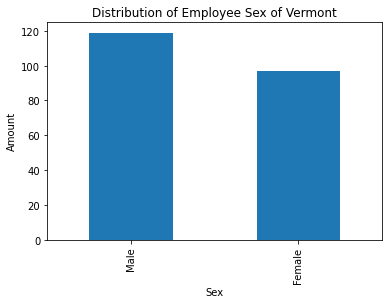

In [ ]:
sexGraphVM = dfMergedSexVM["Sex Category"].value_counts()
axSexVM = sexGraphVM.plot(title = "Distribution of Employee Sex of Vermont", kind = "bar")
axSexVM.set_xlabel('Sex')
axSexVM.set_ylabel('Amount')

Text(0, 0.5, 'Amount')

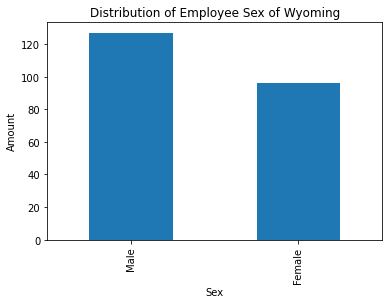

In [ ]:
sexGraphWY = dfMergedSexWY["Sex Category"].value_counts()
axSexWY = sexGraphWY.plot(title = "Distribution of Employee Sex of Wyoming", kind = "bar")
axSexWY.set_xlabel('Sex')
axSexWY.set_ylabel('Amount')

Text(0, 0.5, 'Amount')

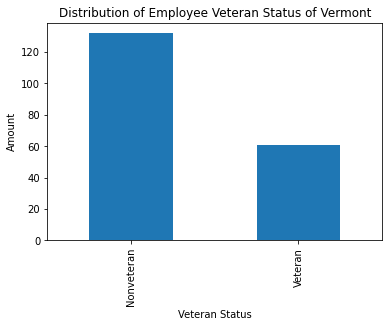

In [ ]:
vetGraphVM = dfMergedVetVM["Veteran Category"].value_counts()
axVetVM = vetGraphVM.plot(title = "Distribution of Employee Veteran Status of Vermont", kind = "bar")
axVetVM.set_xlabel('Veteran Status')
axVetVM.set_ylabel('Amount')

Text(0, 0.5, 'Amount')

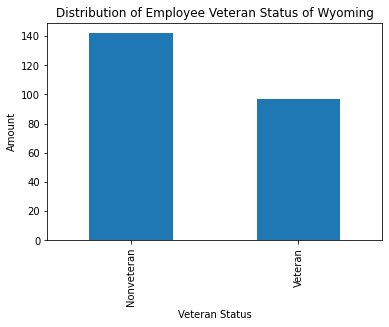

In [ ]:
vetGraphWY = dfMergedVetWY["Veteran Category"].value_counts()
axVetWY = vetGraphWY.plot(title = "Distribution of Employee Veteran Status of Wyoming", kind = "bar")
axVetWY.set_xlabel('Veteran Status')
axVetWY.set_ylabel('Amount')

In [ ]:
fig = px.choropleth(locations=["WY","VT"], locationmode="USA-states", color=[1,2], scope="usa", 

    title="United States of America: Vermont vs Wyoming, Round 2: Electric Boogaloo")

fig.show()